In [4]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Řešení kvízu z desáté lekce

## Část 1

### Otázka 1

Vyber ze seznamu úlohy, které patří do skupiny unsupervised learning. Jsou dvě.

* *Máš data o bankovních transakcím, přičemž o žádné z nich nevíš, jestli je to běžná či podvodná transakce. Tvým cílem je identifikovat neobvyklé transakce, které by mohly být podvodné.*
* *Máš dataset o lidech, kteří si kupují lístky na kulturní akce. O každém uživateli a uživatelce víš, které akce navštívil(a), věk, pohlaví a další informace. Tvým úkolem je rozdělit uživatele do skupin, přičemž nevíš, kolik by takových skupin mělo být nebo kdo do jaké skupiny patří.*

### Otázka 2

Co platí o počtu centroidů a počtu shluků?

*Počet shluků je vždy stejný jako počet centroidů, protože každý shluk má jeden centroid ve svém středu.*

### Otázka 3

Jaký volíme poměr trénovacích a testovacích dat při použití unsupervised learning?

*Data na testovací a trénovací vůbec nedělíme.*

### Otázka 4

Jak se nazývá postup, který umí snížit počet sloupců (features) datasetu? Uveď obecný název postupu a alespoň jeden algoritmus, který se pro tento postup používá (obojí je uvedeno v lekci).

*Redukce dimensionality, příklad konkrétní metody je TSNE*

## Část 2

Pro tuto část budeš potřebovat data se souboru Country-data.csv, který obsahuje data o státech světa.

Níže je význam jednotlivých sloupců:

child_mort - Úmrtnost dětí do 5 let věku na 1000 živě narozených dětí
exports - Export zboží a služeb na osobu. Udáváno jako procento HDP na osobu
health - Celkové výdaje na zdravotnictví na osobu. Udáváno jako procento HDP na osobu
imports - Import zboží a služeb na osobu. Udáváno jako procento HDP na osobu
income - Čistý příjem na osobu
inflation - Měření roční míry růstu celkového HDP
life_expec - Průměrný počet let, které by novorozené dítě žilo, pokud by současné vzorce úmrtnosti zůstaly stejné
total_fer - Počet dětí, které by se narodily každé ženě, pokud by současné věkové plodnostní sazby zůstaly stejné
gdpp - HDP na osobu


### Otázka 5

Níže je kód, pomocí kterého se někdo snaží zobrazit si data v datasetu, aby se podíval, kolik skupin tam potenciálně je. Oproti postupu v lekci ale v kódu něco chybí, takže graf zachycuje pouze část informací, které jsou v datech. Které dva řádky je třeba do kódu doplnit?

Po doplnění bys měl(a) získat graf, který je níže.

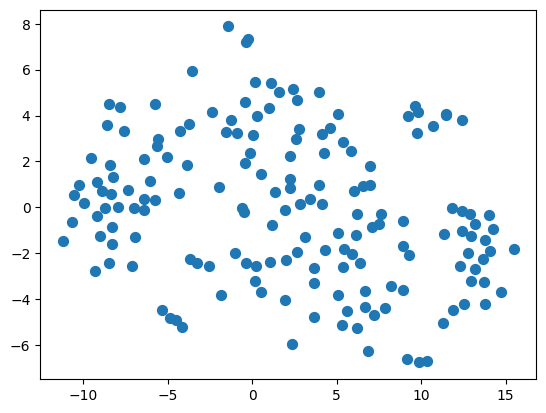

In [5]:
X = pd.read_csv("Country-data.csv")
X = X.drop(columns="country")
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Toto je řešení
tsne = TSNE(n_components=2, random_state=42)
X = tsne.fit_transform(X)
# Konec řešení

plt.scatter(X[:, 0], X[:, 1], s=50)

### Otázka 6

Nyní využij opravený (doplněný) kód z předchozí otázky. Uvažuj, že jsme provedli shlukování dat pomocí příkazů níže. 

Na obrázku je grafické zobrazení výsledku

Ve skutečnosti ale první část kódu není úplně kompletní. Abychom dospěli k výsledku jako na obrázku, je potřeba doplnit jeden parametr. Který? A jaká bude jeho hodnota?

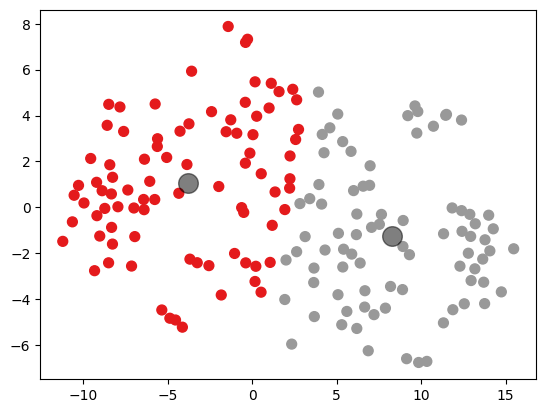

In [6]:
# Tento řádek je řešení
model = KMeans(n_clusters=2, random_state=42, n_init="auto")
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

### Otázka 7

Níže je hodnota metriky intertia pro různé počty shluků pro zadaná data. Jaký je podle tebe nejlepší počet shluků pro tato data?

![kviz_4.png](kviz_4.png)

*3 nebo 4*

### Otázka 8

Inertia není jediná metrika, která nám pomůže v určení ideálního počtu clusterů. Jak se jmenuje metrika, která je použita v kódu méně?

In [ ]:
from sklearn.metrics import silhouette_score


scores = []
cluster_counts = range(2, 10)
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto")
    labels = model.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.plot(cluster_counts, scores,)

*Silhouette koeficient*

### Otázka 9

V proměnné labels máš uložená čísla shluků, do které patří jednotlivé státy. Ten byl získán pomocí příkazu

```py
labels = model.fit_predict(X)

Nyní jsme si opět načetli data do tabulky data.

data = pd.read_csv("Country-data.csv")
data["labels"] = labels
```

Jak do tabulky vložit sloupec cluster, který bude obsahovat číslo shluku, do které daný stát patří? Napiš jeden příkaz, který toto zařídí. (Na obrázku je příklad výpisu při použití 3 shluků, ale příkaz na vložení sloupce do tabulky funguje obecně, bez ohledu na počet shluků.)

![kviz_5.png](kviz_5.png)

```py
data["cluster"] = labels
```